<a href="https://colab.research.google.com/github/Armos05/DCE-MRI-data-noise-reduction/blob/main/Ct_noise_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the data

In [ ]:
import numpy as np

a = np.zeros([3,4])
l1 = [1,2,3]
a[:,1] = l1
a

array([[0., 1., 0., 0.],
       [0., 2., 0., 0.],
       [0., 3., 0., 0.]])

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Ct_noise_50.csv', header = None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.040774,-0.073692,-0.002542,-0.029474,0.121323,0.033887,0.031134,0.045949,0.051955,-0.084176,-0.010589,0.046356,0.008893,0.042558,-0.008003,0.026339,-0.073087,0.027564,0.050354,0.006066,0.033116,-0.022320,-0.007121,-0.028217,0.063987,0.031957,0.017256,-0.023832,-0.027858,0.079389,0.052553,-0.049095,0.010247,0.011994,-0.032437,0.002373,0.041380,0.045991,0.077203,0.051842,...,-0.015697,0.157351,-0.009441,0.058312,-0.075740,0.054611,-0.005745,-0.002431,-0.016197,0.014772,0.095284,-0.037435,0.073196,-0.079680,-0.049340,0.066809,-0.034239,0.076462,-0.045749,0.018195,-0.018356,0.012135,-0.026933,-0.063149,0.037986,-0.034753,-0.031913,0.077729,0.104096,-0.071496,0.063474,-0.055001,0.102474,0.082052,-0.026912,-0.060049,-0.078887,0.014812,-0.029312,0.001841
1,0.040869,-0.001158,-0.039710,0.075499,-0.016630,-0.024617,0.051387,-0.042205,0.031300,0.003012,-0.077358,0.017066,-0.107406,0.085697,0.055997,0.072333,0.082275,-0.004926,0.031207,0.124933,-0.034693,0.043105,0.105866,0.019469,-0.010782,0.034270,-0.030090,0.013951,0.007698,0.015205,-0.041528,-0.035194,-0.045412,0.013175,-0.007969,-0.027846,0.017538,-0.033511,-0.053782,0.069028,...,0.065995,-0.048691,-0.011079,-0.004783,0.041644,0.039630,0.038525,0.005689,-0.038809,0.107854,0.080664,-0.036734,-0.036126,0.003376,-0.062132,0.013411,0.073510,0.017524,0.064398,-0.011130,0.003871,0.041757,-0.016337,-0.009940,-0.003943,-0.019056,0.022862,0.009741,-0.040435,-0.057968,0.033201,0.060739,-0.074289,-0.058336,-0.100388,-0.048050,-0.067223,-0.010826,-0.010127,0.020237
2,0.007764,-0.029022,-0.020167,-0.038545,0.070852,0.024054,-0.002971,0.055501,-0.009897,0.048916,-0.025139,0.074367,0.037098,0.068616,-0.053073,0.013161,0.034776,-0.047706,0.056174,-0.028132,-0.013074,0.061892,-0.044671,0.027636,-0.008575,0.035517,0.016479,-0.019950,-0.034969,0.007673,-0.005848,-0.074794,0.007299,0.014483,0.056924,0.018844,0.051327,-0.083453,0.071800,-0.089992,...,-0.062356,-0.058914,0.056855,-0.016675,-0.054009,-0.035987,0.070842,0.028964,0.021843,0.019191,0.023098,0.020774,0.023702,-0.004100,0.049490,0.037675,-0.120606,-0.020390,0.013245,0.006066,-0.036890,0.039813,-0.050926,0.048946,0.048014,-0.034857,0.065356,0.020370,0.041652,-0.008658,0.025394,-0.019180,-0.010132,0.008064,-0.026334,-0.025493,0.056825,0.016132,-0.113047,0.049070
3,0.031730,0.068875,0.046098,-0.052462,-0.039865,0.078999,0.008925,0.058687,-0.007306,-0.008230,0.148643,0.078124,-0.108099,0.034257,-0.049263,-0.011859,0.074023,-0.022826,-0.019519,-0.038690,-0.052829,-0.001231,0.044820,0.023567,0.018585,0.033507,0.013248,-0.032479,-0.016099,0.022151,0.090696,0.043714,0.047820,-0.004622,0.005403,0.048885,0.024423,-0.012082,-0.032404,0.065351,...,0.041452,0.060767,0.025093,0.052514,0.065214,0.015693,0.034385,-0.043681,-0.087716,-0.008942,0.026214,0.036557,0.021191,0.114720,-0.011731,0.012052,-0.013140,-0.018946,0.004824,-0.020537,0.066214,0.024568,0.034912,-0.001930,-0.084855,0.053553,-0.028756,-0.098296,-0.000485,-0.018576,0.068425,0.054629,0.021207,-0.006578,0.051787,-0.107803,0.032148,0.073888,0.043185,0.021341
4,0.026112,-0.067281,0.015233,0.053319,0.015816,0.052360,-0.025936,-0.033216,-0.033730,0.034313,0.030113,-0.023694,0.022532,-0.059008,0.006414,-0.045244,-0.007190,-0.019435,0.008208,-0.058337,0.059830,0.054942,0.031695,0.009411,-0.028166,-0.015599,0.106063,0.071784,-0.009475,-0.017150,0.001572,-0.063688,0.084998,-0.027902,0.048842,0.015703,0.019691,0.008517,-0.042503,0.098264,...,0.019278,-0.013264,0.065065,-0.032154,-0.003413,0.058857,0.038793,-0.023083,-0.047237,-0.050883,-0.019623,-0.009742,-0.014699,0.023548,-0.046483,0.027360,0.019549,0.105569,0.057792,-0.070427,-0.035168,0.005668,0.017795,0.010144,-0.030911,-0.088149,0.058707,0.120817,0.000117,0.045727,-0.073792,-0.001715,-0.011148,-0.064253,-0.004942,0.

In [ ]:
data.shape

(157, 100)

In [ ]:
pip install tsmoothie

In [ ]:
import statistics
import pywt
import sys
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *


In [ ]:
#Truth = data[data.columns[0]].tolist()
#Value_5 = data[data.columns[1]].tolist()
#Value_10 = data[data.columns[2]].tolist()
#Value_20 = data[data.columns[3]].tolist()

#dt = []
#for i in range(len(Truth)):
#  dt.append(i+1)
# print(len(dt))

# 100 column code
T_smoothie_results = np.zeros([157,100])
Median_results = np.zeros([157,100])
Wavelet_results = np.zeros([157,100])

# 1 column code
#T_smoothie_results = np.zeros([157,1])
#Median_results = np.zeros([157,1])
#Wavelet_results = np.zeros([157,1])


In [ ]:
# 100 code
for l in range(100):

  list_data = data[data.columns[l]].tolist()

  dt = []
  for i in range(len(list_data)):
    dt.append(i+1)

  # Smoothing by T smoothie 

  x = dt

  # results matrix
  k = l

  # data
  y = list_data 

  # operate smoothing
  smoother = ConvolutionSmoother(window_len=4, window_type='ones')
  smoother.smooth(y)

  # generate intervals
  low, up = smoother.get_intervals('sigma_interval', n_sigma=1)
  t_smooth = smoother.smooth_data[0].tolist()

  # Updating results
  T_smoothie_results[:,k] = t_smooth

  #NOW WE DO THE MEDIAN FILTERING
  sm_median = t_smooth 

  """# Window size
  i = 4   
  for k in range(len(t_smooth)-i):
  
    sm_median.append(statistics.median(t_smooth[k:k+i]))
  
  for j in range(i):
    sm_median.append(t_smooth[156-i+j]) 
  #print(len(sm_median))

  # Updating Results  
  Median_results[:,l] = sm_median

  # NOW WE DO THE Wavelet Domain Filtering NEXT
  index = dt
  """
  
  # Create wavelet object and define parameters
  w = pywt.Wavelet('sym4')
  maxlev = pywt.dwt_max_level(len(sm_median), w.dec_len)

  # maxlev = 2 # Override if desired
  #print("maximum level is " + str(maxlev))
  threshold = 0.04 # Threshold for filtering

  # Decompose into wavelet components, to the level selected:
  coeffs = pywt.wavedec(sm_median, 'sym4', level=maxlev)

  #cA = pywt.threshold(cA, threshold*max(cA))
  #plt.figure()
  for i in range(1, len(coeffs)):
      #plt.subplot(maxlev, 1, i)
      #plt.plot(coeffs[i])
      coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
      #plt.plot(coeffs[i])


  datarec = pywt.waverec(coeffs, 'sym4')


  mintime = 0
  maxtime = mintime + 157

  # Updating results
  Wavelet_results[:,l] = datarec[mintime:maxtime].tolist()



In [ ]:
T_smoothie_results

array([[ 0.0342103 , -0.03574453, -0.02093407, ...,  0.00482103,
        -0.03838484,  0.01864529],
       [ 0.03238244, -0.02173782, -0.00377246, ...,  0.0217637 ,
        -0.02772233,  0.01886606],
       [ 0.02944988, -0.02045565, -0.00021761, ...,  0.00889497,
        -0.02310749,  0.03414994],
       ...,
       [ 0.09871909,  0.13967586,  0.0777237 , ...,  0.09887125,
         0.078765  ,  0.09294496],
       [ 0.09393461,  0.12529232,  0.0698568 , ...,  0.08570743,
         0.09510554,  0.09160637],
       [ 0.11928183,  0.12338912,  0.07769953, ...,  0.08889345,
         0.12034963,  0.10560906]])

In [ ]:
Wavelet_results

array([[ 0.03249816, -0.03437681, -0.01824747, ...,  0.00534808,
        -0.0367845 ,  0.01969974],
       [ 0.03106978, -0.02192195, -0.00349434, ...,  0.02147973,
        -0.02742601,  0.01932596],
       [ 0.03004117, -0.02071686, -0.0012887 , ...,  0.00886994,
        -0.02281516,  0.03248491],
       ...,
       [ 0.10165576,  0.13729112,  0.08020094, ...,  0.09928566,
         0.08120892,  0.09354471],
       [ 0.09686491,  0.12500441,  0.07215254, ...,  0.08741479,
         0.09750802,  0.09210412],
       [ 0.1202371 ,  0.12312533,  0.07846836, ...,  0.09048785,
         0.12116914,  0.10447472]])

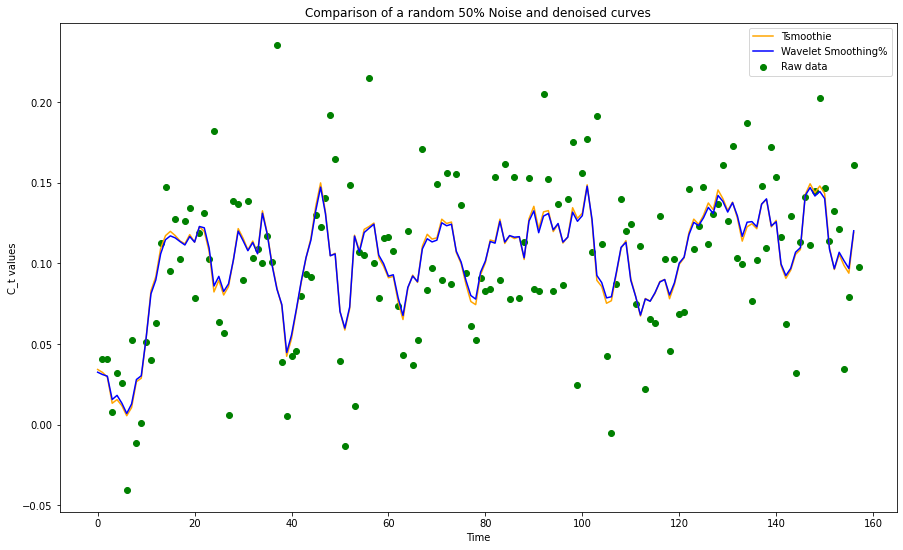

In [ ]:
plt.figure(figsize=(15,9))
plt.scatter(dt,data[data.columns[0]].tolist(), color = 'green', label = 'Raw data')
plt.plot(T_smoothie_results[:,0], color='orange', label = 'Tsmoothie')
#plt.plot(Median_results[:85], color = 'green', label = "Median Smoothing")
plt.plot(Wavelet_results[:,0],color='blue', label = 'Wavelet Smoothing%')

plt.xlabel('Time')
plt.ylabel('C_t values')
plt.title('Comparison of a random 50% Noise and denoised curves')
plt.legend()

In [ ]:
import pandas as pd

DF1 = pd.DataFrame(T_smoothie_results)
DF2 = pd.DataFrame(Wavelet_results)

# save the dataframe as a csv file
DF1.to_csv("Tsmoothie_50_n.csv")
DF2.to_csv("Wavelet_50_n.csv")

In [ ]:
data = pd.read_csv('Ct_noise_50_avg.csv', header = None)
data2 = pd.read_csv('Ct_noise_50.csv', header = None)

T_smoothie_results = np.zeros([157,1])
Median_results = np.zeros([157,1])
Wavelet_results = np.zeros([157,1])

In [ ]:
# 1 column code
for l in range(1):

  list_data = data[data.columns[l]].tolist()

  dt = []
  for i in range(len(list_data)):
    dt.append(i+1)

  # Smoothing by T smoothie 

  x = dt

  # results matrix
  k = l

  # data
  y = list_data 

  # operate smoothing
  smoother = ConvolutionSmoother(window_len=4, window_type='ones')
  smoother.smooth(y)

  # generate intervals
  low, up = smoother.get_intervals('sigma_interval', n_sigma=1)
  t_smooth = smoother.smooth_data[0].tolist()

  # Updating results
  T_smoothie_results[:,k] = t_smooth

  #NOW WE DO THE MEDIAN FILTERING
  sm_median = [ ] 

  # Window size
  i = 4   
  for k in range(len(t_smooth)-i):
  
    sm_median.append(statistics.median(t_smooth[k:k+i]))
  
  for j in range(i):
    sm_median.append(t_smooth[156-i+j]) 
  #print(len(sm_median))

  # Updating Results  
  Median_results[:,l] = sm_median

  # NOW WE DO THE Wavelet Domain Filtering NEXT
  index = dt

  # Create wavelet object and define parameters
  w = pywt.Wavelet('sym4')
  maxlev = pywt.dwt_max_level(len(sm_median), w.dec_len)

  # maxlev = 2 # Override if desired
  #print("maximum level is " + str(maxlev))
  threshold = 0.04 # Threshold for filtering

  # Decompose into wavelet components, to the level selected:
  coeffs = pywt.wavedec(sm_median, 'sym4', level=maxlev)

  #cA = pywt.threshold(cA, threshold*max(cA))
  #plt.figure()
  for i in range(1, len(coeffs)):
      #plt.subplot(maxlev, 1, i)
      #plt.plot(coeffs[i])
      coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
      #plt.plot(coeffs[i])


  datarec = pywt.waverec(coeffs, 'sym4')


  mintime = 0
  maxtime = mintime + 157

  # Updating results
  Wavelet_results[:,l] = datarec[mintime:maxtime].tolist()



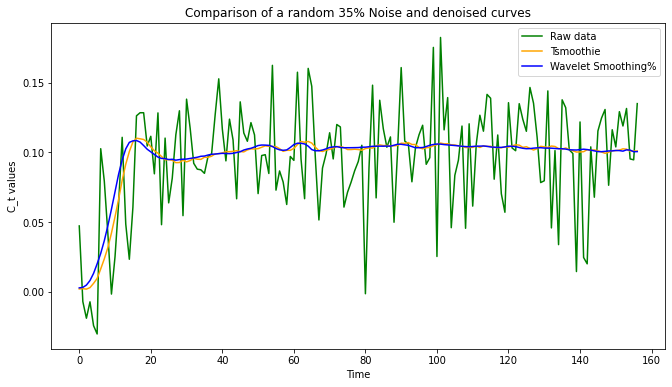

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(data2[data2.columns[0]].tolist(), color = 'green', label = 'Raw data')
plt.plot(T_smoothie_results[:,0], color='orange', label = 'Tsmoothie')
#plt.plot(Median_results[:0], color = 'green', label = "Median Smoothing")
plt.plot(Wavelet_results[:,0],color='blue', label = 'Wavelet Smoothing%')

plt.xlabel('Time')
plt.ylabel('C_t values')
plt.title('Comparison of a random 35% Noise and denoised curves')
plt.legend()

### Writing The DATA INTO CSV

In [ ]:
import pandas as pd

DF1 = pd.DataFrame(T_smoothie_results)
DF2 = pd.DataFrame(Wavelet_results)

# save the dataframe as a csv file
DF1.to_csv("Tsmoothie_50.csv")
DF2.to_csv("Wavelet_50.csv")

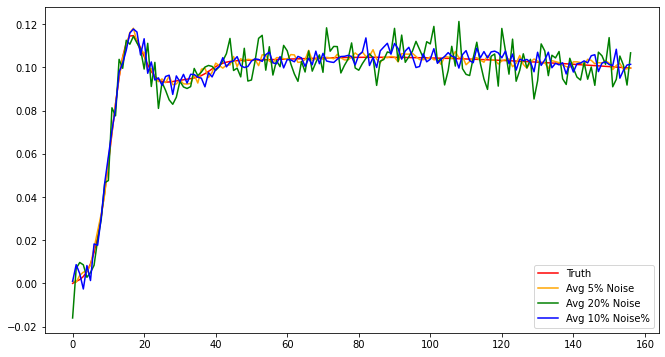

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(Value_5, color='orange', label = 'Avg 5% Noise')
plt.plot(Value_20, color = 'green', label = "Avg 20% Noise")
plt.plot(Value_10,color='blue', label = 'Avg 10% Noise%')

plt.legend()

## Smoothing using tsmoothie

In [ ]:
pip install tsmoothie

### Smoothing 20% Noise

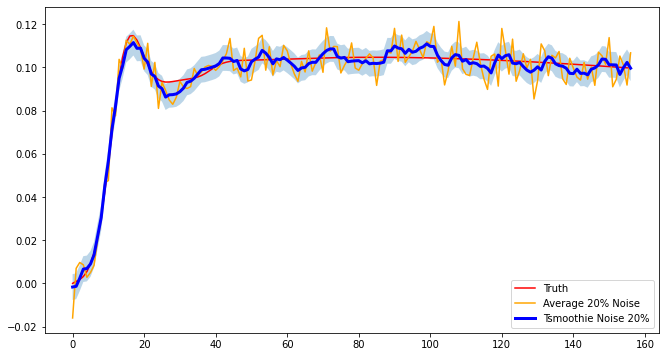

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

x = dt
y = Value_20 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=4, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_20 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 20% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Tsmoothie Noise 20%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

In [ ]:
l1 = smoother.smooth_data[0]

### Smoothing 10% Noise

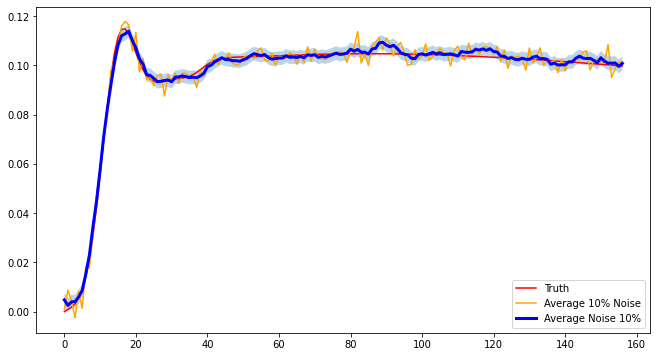

In [ ]:
x = dt
y = Value_10 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=5, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_10 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 10% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Average Noise 10%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

In [ ]:
l2 = smoother.smooth_data[0]

In [ ]:
import pandas  

data = pandas.DataFrame() 
data['Denoised_20%'] = l1 
data['Denoised_10%'] = l2
data.to_excel('New.xlsx', index = False) 

### Smoothing 5%

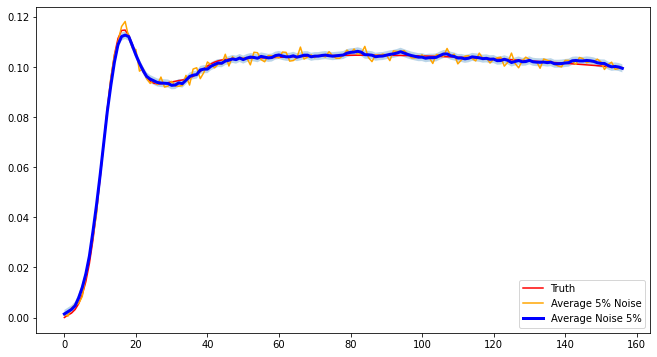

In [ ]:
x = dt
y = Value_5 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=4, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_05 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 5% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Average Noise 5%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

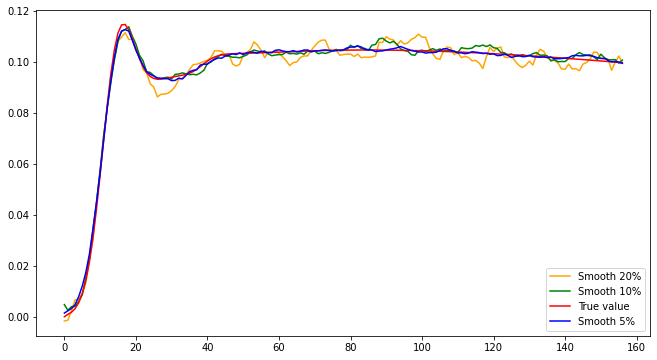

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(sm_20, color='orange', label = "Smooth 20%")
plt.plot(sm_10, color='green', label = "Smooth 10%")
plt.plot(Truth, color = 'red', label = "True value")
plt.plot(sm_05, color='blue', label = "Smooth 5%")
plt.legend()


In [ ]:
#type(sm_05)
sm_05[156]

0.09948503019999999

## Median Filtering

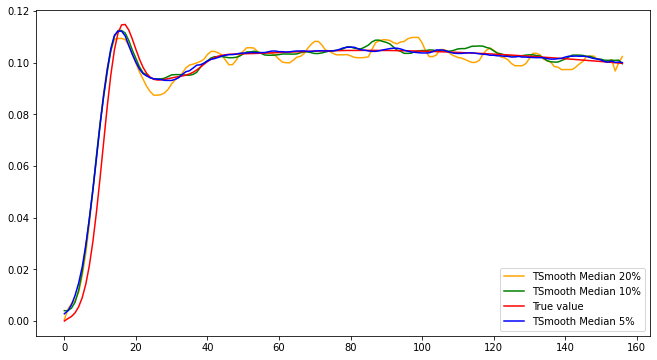

In [ ]:
import statistics

sm_05_median = [ ]
sm_10_median = [ ]
sm_20_median = [ ] 

i = 4   ## Window size
for k in range(len(sm_05)-i):
  
  sm_05_median.append(statistics.median(sm_05[k:k+i]))
  sm_10_median.append(statistics.median(sm_10[k:k+i]))
  sm_20_median.append(statistics.median(sm_20[k:k+i]))
  
for j in range(i):
  sm_05_median.append(sm_05[156-i+j])
  sm_10_median.append(sm_10[156-i+j])
  sm_20_median.append(sm_20[156-i+j])
  

plt.figure(figsize=(11,6))
plt.plot(sm_20_median, color='orange', label = "TSmooth Median 20%")
plt.plot(sm_10_median, color='green', label = "TSmooth Median 10%")
plt.plot(Truth, color = 'red', label = "True value")
plt.plot(sm_05_median, color='blue', label = "TSmooth Median 5%")
plt.legend()


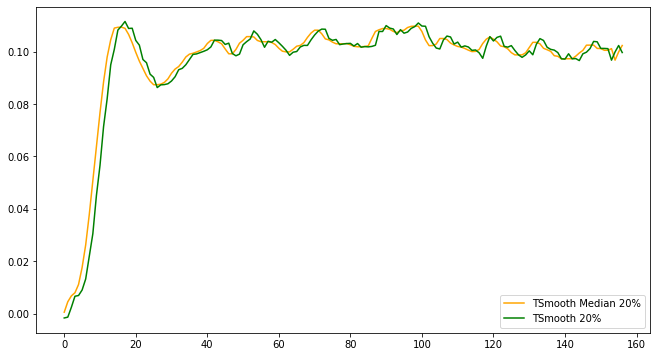

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(sm_20_median, color='orange', label = "TSmooth Median 20%")
plt.plot(sm_20, color='green', label = "TSmooth 20%")
#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Exponential Smoothing

In [ ]:
pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import statsmodels

print(statsmodels.__version__)

0.12.0


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

x = pd.Series(sm_20_median, index = dt)
type(x)

pandas.core.series.Series

Figure 10: Ct value graph


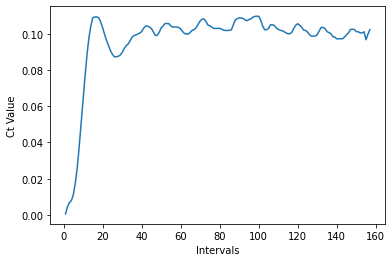

In [ ]:
ax=x.plot()
ax.set_xlabel("Intervals")
ax.set_ylabel("Ct Value")
print("Figure 10: Ct value graph")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

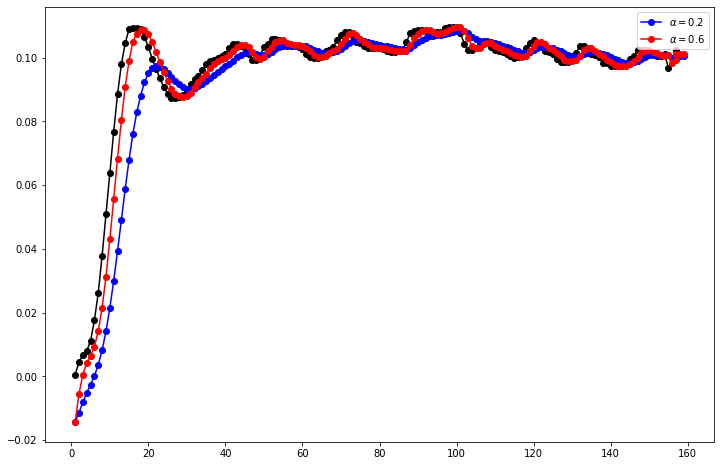

In [ ]:
fit1 = SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(x, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(x, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
#plt.plot(fit3.fittedvalues, marker='o', color='green')
#line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2], [fcast1.name, fcast2.name])

In [ ]:
fit2.fittedvalues.shape

(157,)

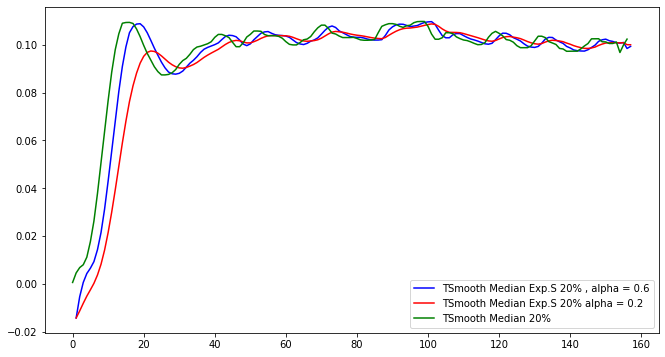

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(fit2.fittedvalues, color='Blue', label = "TSmooth Median Exp.S 20% , alpha = 0.6")
plt.plot(fit1.fittedvalues, color='red', label = "TSmooth Median Exp.S 20% alpha = 0.2")
plt.plot(sm_20_median, color='green', label = "TSmooth Median 20%")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

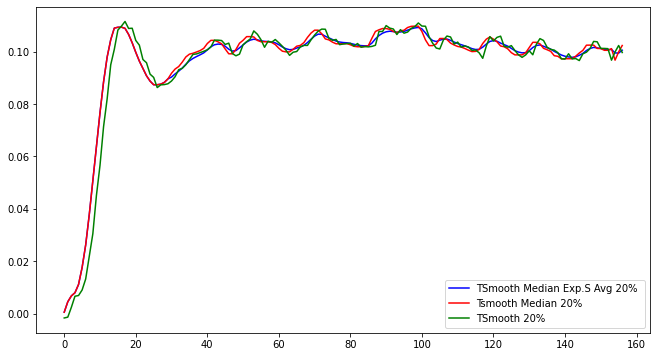

In [ ]:
denoised_20 = [ ]
for i in range(30):
    denoised_20.append(sm_20_median[i])

for j in range(127):
   k = (fit2.fittedvalues.tolist()[30+j] + fit1.fittedvalues.tolist()[30+j] + sm_20_median[30+j])/3
   denoised_20.append(k)

plt.figure(figsize=(11,6))
plt.plot(denoised_20, color='Blue', label = "TSmooth Median Exp.S Avg 20% ")
plt.plot(sm_20_median , color='red', label = "Tsmooth Median 20%")
plt.plot(sm_20, color='green', label = "TSmooth 20%")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Holts Smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

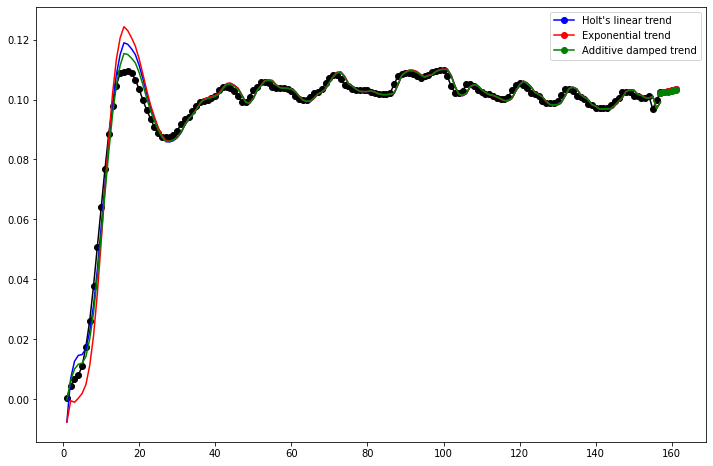

In [ ]:
fit1h = Holt(x, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1h = fit1h.forecast(5).rename("Holt's linear trend")
fit2h = Holt(x, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2h = fit2h.forecast(5).rename("Exponential trend")
fit3h = Holt(x, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3h = fit3h.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(x, marker='o', color='black')
plt.plot(fit1h.fittedvalues, color='blue')
line1, = plt.plot(fcast1h, marker='o', color='blue')
plt.plot(fit2h.fittedvalues, color='red')
line2, = plt.plot(fcast2h, marker='o', color='red')
plt.plot(fit3h.fittedvalues, color='green')
line3, = plt.plot(fcast3h, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1h.name, fcast2h.name, fcast3h.name])

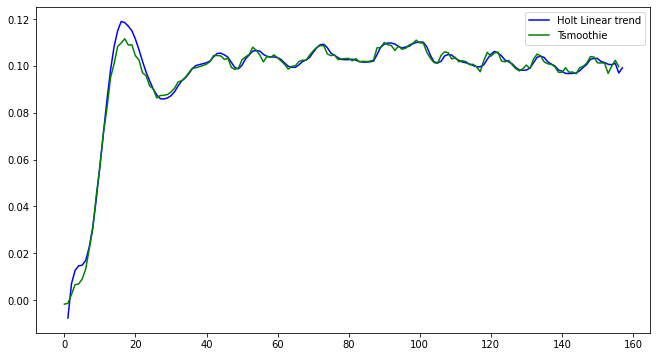

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(fit1h.fittedvalues, color='Blue', label = "Holt Linear trend")
#plt.plot(fit2h.fittedvalues, color='red', label = "Exponential trend")
plt.plot(sm_20, color='green', label = "Tsmoothie ")
#plt.plot(Truth, color = 'orange', label = "True")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Wavelet Domain Filtering

In [ ]:
import pywt
import sys

# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered

# Get data:
#file_object  = open('./Biosignals.txt', 'r')
#raw_data = file_object.readlines()
#index = []
#data = []

#for i in range(len(raw_data)-1):
#    x, y = raw_data[i].split('\t')
#    X = float(x)
#    Y = float(y)
#    index.append(X)
#    data.append(Y)

index = dt

# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(denoised_20), w.dec_len)

# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(denoised_20, 'sym4', level=maxlev)

#cA = pywt.threshold(cA, threshold*max(cA))
#plt.figure()
for i in range(1, len(coeffs)):
    #plt.subplot(maxlev, 1, i)
    #plt.plot(coeffs[i])
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    #plt.plot(coeffs[i])


datarec = pywt.waverec(coeffs, 'sym4')


mintime = 0
maxtime = mintime + 158



maximum level is 4


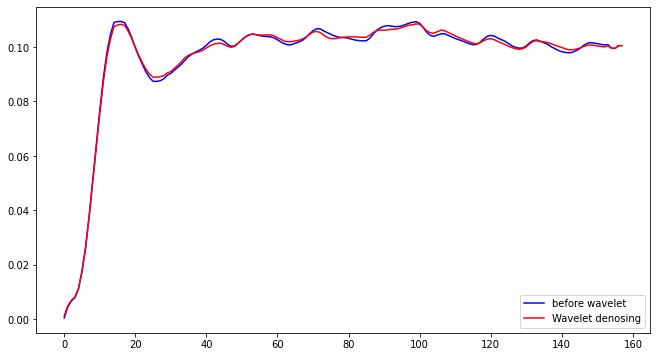

In [ ]:
plt.figure(figsize=(11,6))

plt.plot(denoised_20[mintime:maxtime], color= 'blue', label="before wavelet")
plt.plot(datarec[mintime:maxtime], color = 'red', label = "Wavelet denosing")
plt.legend()
#plt.tight_layout()
plt.show()
